In [540]:
# Start coding here...

Company Background
Java June is a coffee franchise looking to expand its business to a new market. Their strategy
of rapid and sustainable growth is to get the most number of reviews in one year after a new
coffee shop opens. Based on their data, all coffee franchises in other markets can get over
450 reviews on average after one year.


Customer Questions
The marketing manager has asked you to answer the following:

● Can you predict whether a newly opened coffee shop can get over 450 reviews based
on its characteristics?

Dataset
The dataset contains information about coffee shops after 1 year of opening in this new
market. The data is available in a DataCamp Workspace, which you can find from the
certification dashboard.

The dataset needs to be validated based on the description below:

Column Name Criteria

Region Character, one of 10 possible regions (A to J) where coffee shop is located.

Place name Character, name of the shop.

Place type Character, the type of coffee shop, one of “Coffee shop”, “Cafe”, “Espresso bar”, and “Others”.

Rating Numeric, coffee shop rating (on a 5 point scale). 
Remove the rows if the rating is missing.

Enough Reviews Binary, whether the number of reviews is over 450 or not, either True
or False.

Price Character, price category, one of 3 categories.

Delivery option Binary, describing whether there is a delivery option, either True or False.

Dine in option Binary, describing whether there is a dine-in option, either True or False. Replace missing values with False.

Takeout option Binary, describing whether there is a takeout option, either True or False. Replace missing values with False.


In [541]:
library(tidyverse)

In [542]:
library(rpart)
library(rpart.plot)

In [543]:
coffee <- read_csv("coffeeDSA.csv")

Rows: 200 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Region, Place name, Place type, Price
dbl (1): Rating
lgl (4): Enough Reviews, Delivery option, Dine in option, Takeout option

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [544]:
summary(coffee)

    Region           Place name         Place type            Rating     
 Length:200         Length:200         Length:200         Min.   :3.900  
 Class :character   Class :character   Class :character   1st Qu.:4.600  
 Mode  :character   Mode  :character   Mode  :character   Median :4.700  
                                                          Mean   :4.664  
                                                          3rd Qu.:4.800  
                                                          Max.   :5.000  
                                                          NA's   :2      
 Enough Reviews     Price           Delivery option Dine in option
 Mode :logical   Length:200         Mode :logical   Mode:logical  
 FALSE:126       Class :character   FALSE:165       TRUE:140      
 TRUE :74        Mode  :character   TRUE :35        NA's:60       
                                                                  
                                                                  
      

In [545]:
names(coffee) <- make.names(names(coffee))

In [546]:
head(coffee)

Region,Place.name,Place.type,Rating,Enough.Reviews,Price,Delivery.option,Dine.in.option,Takeout.option
<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>
C,Dim Kavu,Others,4.6,FALSE,$$,FALSE,NA,NA
C,Коферум,Cafe,5.0,FALSE,$$,FALSE,NA,TRUE
C,Кофейня Світ Чаю,Coffee shop,5.0,FALSE,$$,FALSE,NA,TRUE
C,Кофейня Starcoff,Coffee shop,4.4,FALSE,$$,FALSE,TRUE,TRUE
C,"Кофейня ""Friend Zone""",Coffee shop,5.0,FALSE,$$,FALSE,TRUE,TRUE
C,Racers Coffee Shop,Espresso bar,4.6,FALSE,$$,FALSE,TRUE,TRUE


In [547]:
coffee <- coffee %>% drop_na(Rating)

In [548]:
summary(coffee)

    Region           Place.name         Place.type            Rating     
 Length:198         Length:198         Length:198         Min.   :3.900  
 Class :character   Class :character   Class :character   1st Qu.:4.600  
 Mode  :character   Mode  :character   Mode  :character   Median :4.700  
                                                          Mean   :4.664  
                                                          3rd Qu.:4.800  
                                                          Max.   :5.000  
 Enough.Reviews     Price           Delivery.option Dine.in.option
 Mode :logical   Length:198         Mode :logical   Mode:logical  
 FALSE:124       Class :character   FALSE:163       TRUE:140      
 TRUE :74        Mode  :character   TRUE :35        NA's:58       
                                                                  
                                                                  
                                                                  
 Takeout.opti

In [549]:
coffee[c('Dine.in.option',"Takeout.option")][is.na(coffee[c('Dine.in.option',"Takeout.option")])]<- FALSE


In [550]:
summary(coffee)

    Region           Place.name         Place.type            Rating     
 Length:198         Length:198         Length:198         Min.   :3.900  
 Class :character   Class :character   Class :character   1st Qu.:4.600  
 Mode  :character   Mode  :character   Mode  :character   Median :4.700  
                                                          Mean   :4.664  
                                                          3rd Qu.:4.800  
                                                          Max.   :5.000  
 Enough.Reviews     Price           Delivery.option Dine.in.option 
 Mode :logical   Length:198         Mode :logical   Mode :logical  
 FALSE:124       Class :character   FALSE:163       FALSE:58       
 TRUE :74        Mode  :character   TRUE :35        TRUE :140      
                                                                   
                                                                   
                                                                   
 Takeo

In [551]:
coffee$Price <- as.factor(coffee$Price)
coffee$Region <- as.factor(coffee$Region)
coffee$Place.type <- as.factor(coffee$Place.type)

In [552]:
summary(coffee)

     Region    Place.name               Place.type     Rating     
 A      :20   Length:198         Cafe        :57   Min.   :3.900  
 B      :20   Class :character   Coffee shop :96   1st Qu.:4.600  
 C      :20   Mode  :character   Espresso bar:20   Median :4.700  
 D      :20                      Others      :25   Mean   :4.664  
 E      :20                                        3rd Qu.:4.800  
 G      :20                                        Max.   :5.000  
 (Other):78                                                       
 Enough.Reviews  Price     Delivery.option Dine.in.option  Takeout.option 
 Mode :logical   $  :  2   Mode :logical   Mode :logical   Mode :logical  
 FALSE:124       $$ :192   FALSE:163       FALSE:58        FALSE:54       
 TRUE :74        $$$:  4   TRUE :35        TRUE :140       TRUE :144      
                                                                          
                                                                          
              

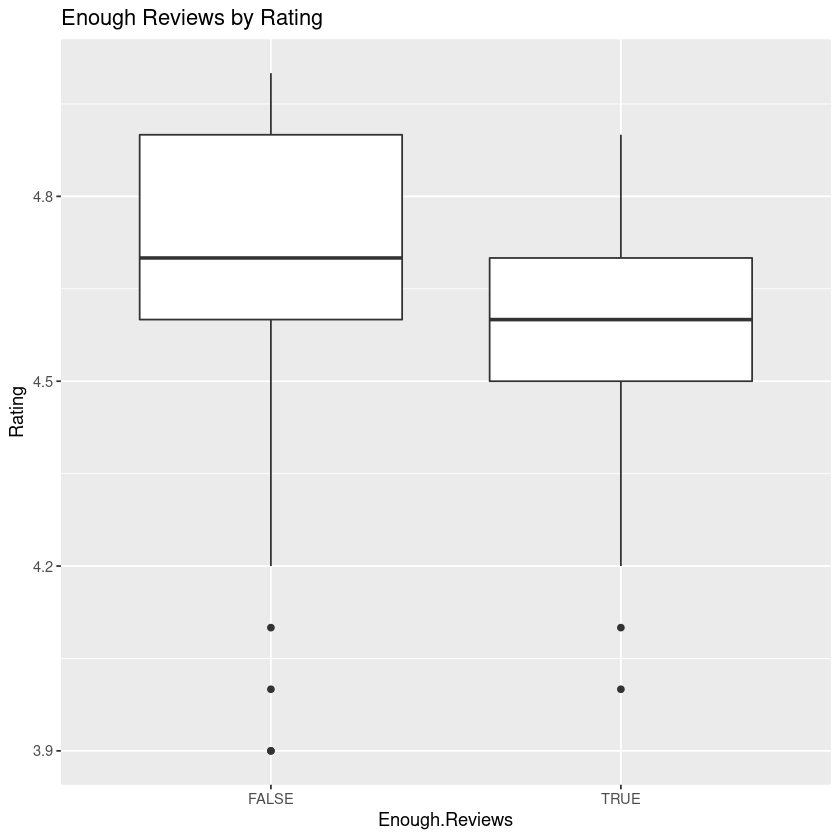

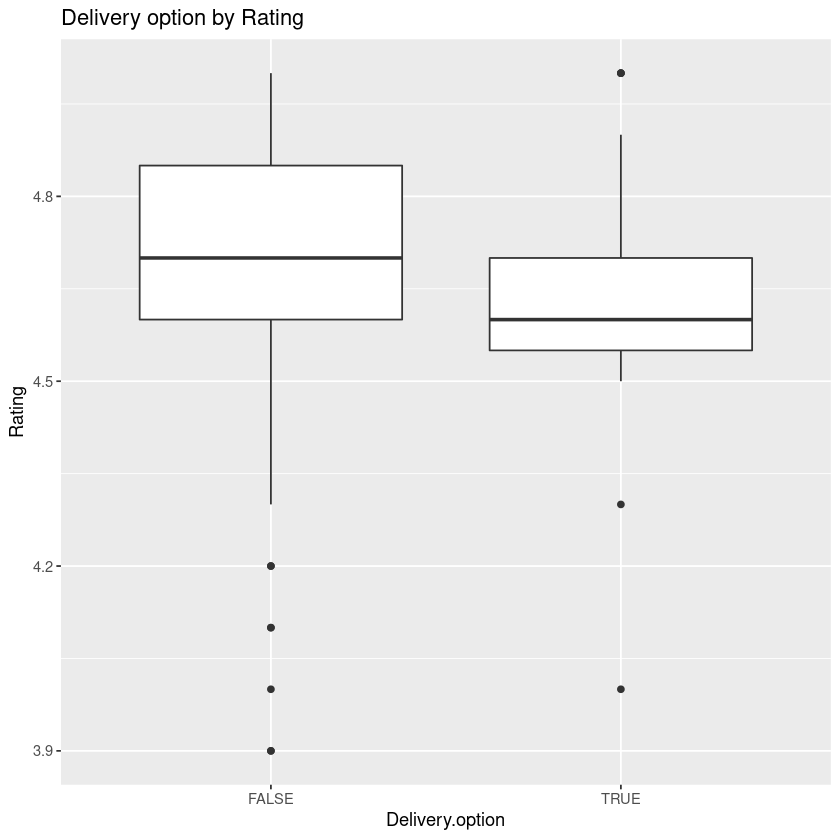

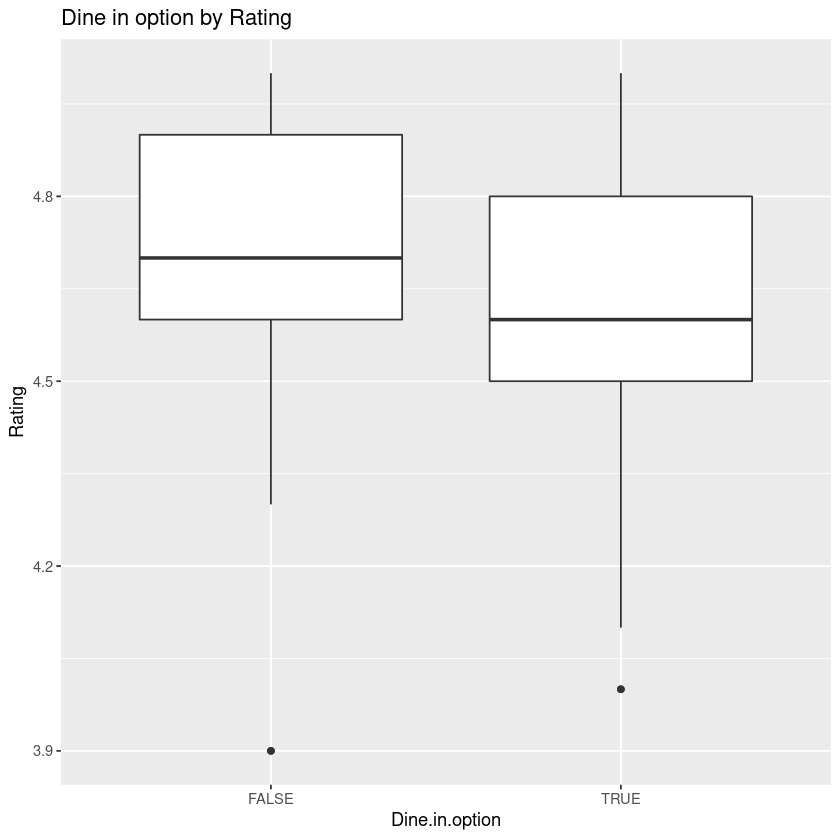

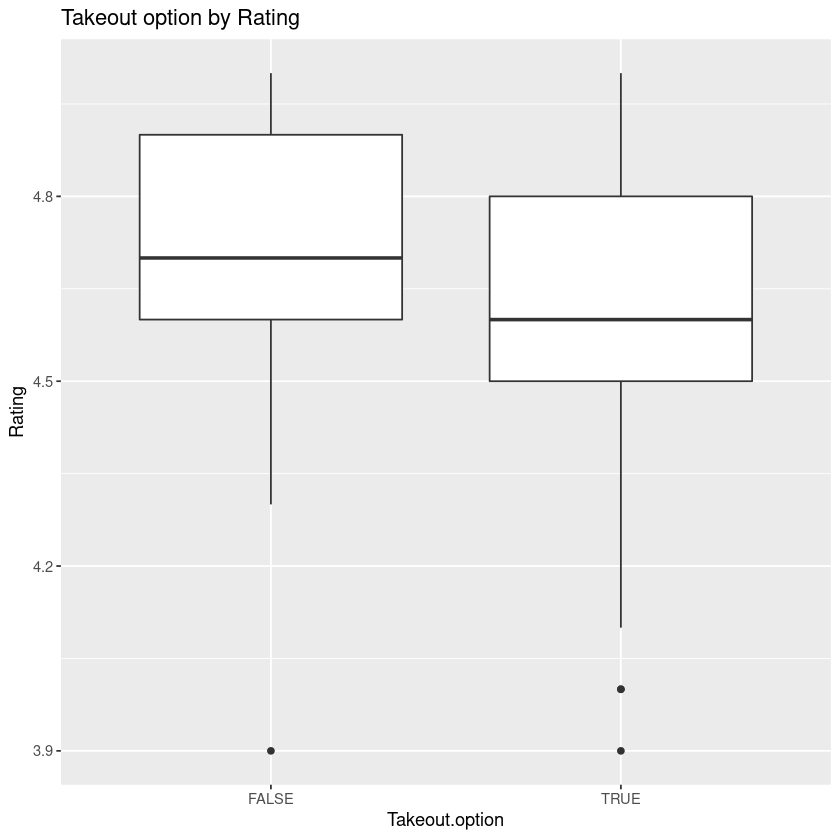

In [553]:
coffee %>% ggplot(aes(x=Enough.Reviews,Rating)) + geom_boxplot() + labs(title = "Enough Reviews by Rating")
coffee %>% ggplot(aes(x=Delivery.option,Rating)) + geom_boxplot() + labs(title = "Delivery option by Rating")
coffee %>% ggplot(aes(x=Dine.in.option,Rating)) + geom_boxplot() + labs(title = "Dine in option by Rating")
coffee %>% ggplot(aes(x=Takeout.option,Rating)) + geom_boxplot() + labs(title = "Takeout option by Rating")

pelos boxplot, aparentemente todas as variaveis tem diferença significativa da média entre true e false


In [554]:
head(coffee)

Region,Place.name,Place.type,Rating,Enough.Reviews,Price,Delivery.option,Dine.in.option,Takeout.option
<fct>,<chr>,<fct>,<dbl>,<lgl>,<fct>,<lgl>,<lgl>,<lgl>
C,Dim Kavu,Others,4.6,FALSE,$$,FALSE,FALSE,FALSE
C,Коферум,Cafe,5.0,FALSE,$$,FALSE,FALSE,TRUE
C,Кофейня Світ Чаю,Coffee shop,5.0,FALSE,$$,FALSE,FALSE,TRUE
C,Кофейня Starcoff,Coffee shop,4.4,FALSE,$$,FALSE,TRUE,TRUE
C,"Кофейня ""Friend Zone""",Coffee shop,5.0,FALSE,$$,FALSE,TRUE,TRUE
C,Racers Coffee Shop,Espresso bar,4.6,FALSE,$$,FALSE,TRUE,TRUE


In [555]:
coffee %>% count(Enough.Reviews) %>% arrange(desc(n))

Enough.Reviews,n
<lgl>,<int>
FALSE,124
TRUE,74


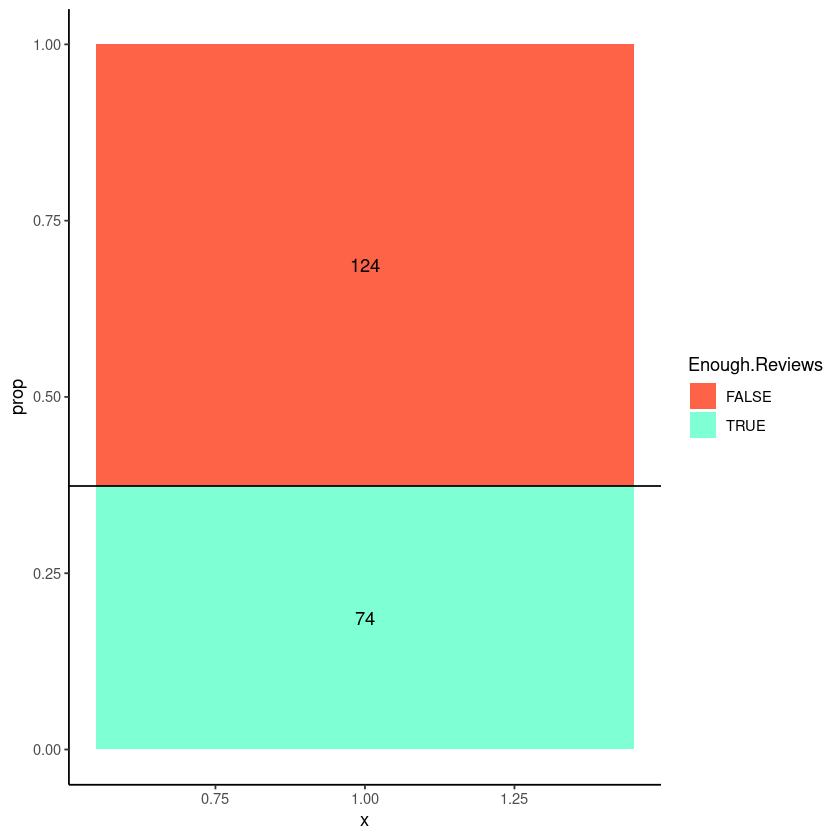

In [556]:
coffee %>% 
count(Enough.Reviews) %>%
mutate(prop = prop.table(n)) %>%
ggplot(aes(1, prop, fill = Enough.Reviews, label = n)) + 
geom_col(position = "fill") + geom_text(position = position_fill(vjust = 0.5)) + scale_fill_manual(values = c("#FF6347","#7FFFD4")) + theme_classic() + geom_hline(yintercept = 0.3737)

In [557]:
(74/(124+74))*100

[1] 37.37374

Apenas 37% dos lugares tem reviews o suficiente 

In [558]:
Enough %>% count(Price) %>% arrange(desc(n))
NotEnough %>% count(Price) %>% arrange(desc(n))

Price,n
<fct>,<int>
$$,69
$$$,3
$,2


Price,n
<fct>,<int>
$$,123
$$$,1


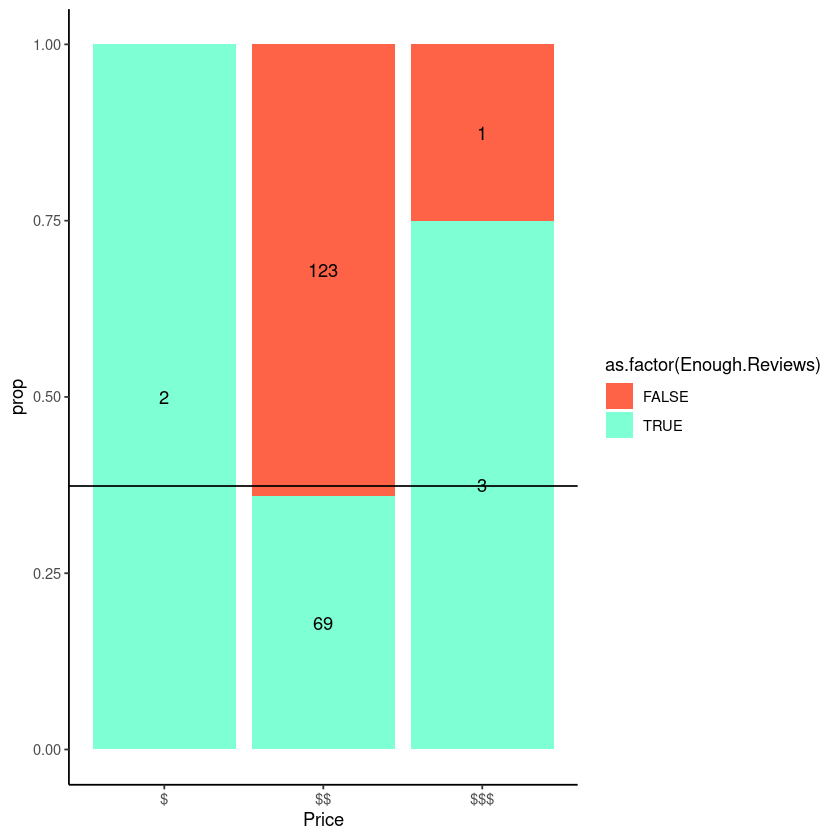

In [559]:
coffee %>% 
count(Price,Enough.Reviews) %>%
group_by(Price) %>%
mutate(prop = prop.table(n)) %>%
ggplot(aes(Price, prop, fill = as.factor(Enough.Reviews), label = n)) + 
geom_col(position = "fill") + 
geom_text(position = position_fill(vjust = 0.5)) + scale_fill_manual(values = c("#FF6347","#7FFFD4")) + theme_classic() + geom_hline(yintercept = 0.3737)

In [560]:
barato <- coffee %>% filter(Price == '$')
caro <- coffee %>% filter(Price == '$$$')
barato
caro

Region,Place.name,Place.type,Rating,Enough.Reviews,Price,Delivery.option,Dine.in.option,Takeout.option
<fct>,<chr>,<fct>,<dbl>,<lgl>,<fct>,<lgl>,<lgl>,<lgl>
C,Кафе на Георгіївській,Cafe,4.5,TRUE,$,FALSE,TRUE,TRUE
G,Espressoholic,Espresso bar,4.6,TRUE,$,FALSE,TRUE,TRUE


Region,Place.name,Place.type,Rating,Enough.Reviews,Price,Delivery.option,Dine.in.option,Takeout.option
<fct>,<chr>,<fct>,<dbl>,<lgl>,<fct>,<lgl>,<lgl>,<lgl>
J,KOFEiN,Cafe,4.4,TRUE,$$$,FALSE,TRUE,TRUE
D,ЕТУАЛЬ КАФЕ,Cafe,4.6,FALSE,$$$,TRUE,TRUE,TRUE
H,DoubleDecker Cake and Coffee,Others,4.7,TRUE,$$$,TRUE,TRUE,TRUE
H,Artist,Others,4.6,TRUE,$$$,FALSE,TRUE,TRUE


Comparando por preço, a grande maioria dos lugares tem preço médio. Todos os com preço baixo tem reviews o suficiente (mas é um número muito pequeno) e 75% dos mais caros tem reviews o suficiente (também pouco para saber se é significativo)

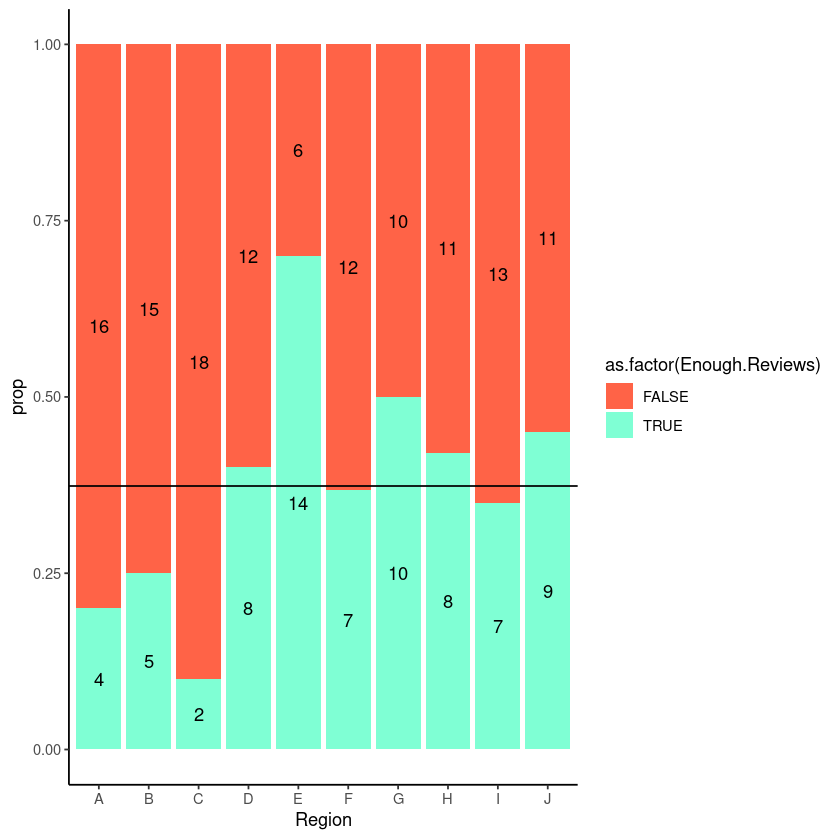

In [561]:
coffee %>% 
count(Region,Enough.Reviews) %>%
group_by(Region) %>%
mutate(prop = prop.table(n)) %>%
ggplot(aes(Region, prop, fill = as.factor(Enough.Reviews), label = n)) + 
geom_col(position = "fill") + 
geom_text(position = position_fill(vjust = 0.5)) + scale_fill_manual(values = c("#FF6347","#7FFFD4")) + theme_classic() + geom_hline(yintercept = 0.3737)

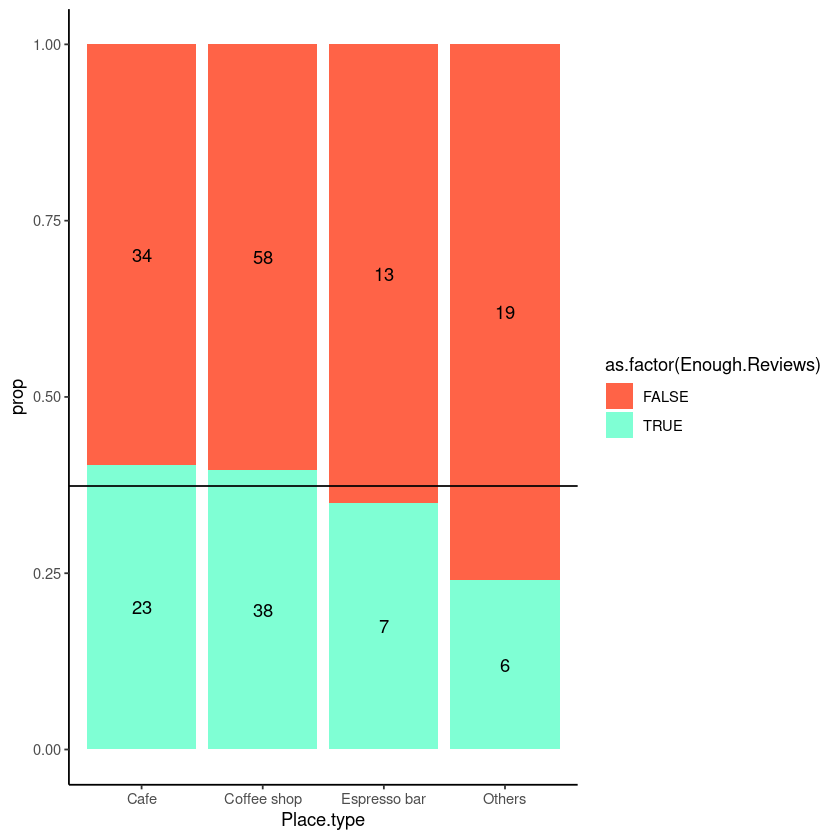

In [562]:
coffee %>% 
count(Place.type,Enough.Reviews) %>%
group_by(Place.type) %>%
mutate(prop = prop.table(n)) %>%
ggplot(aes(Place.type, prop, fill = as.factor(Enough.Reviews), label = n)) + 
geom_col(position = "fill") + 
geom_text(position = position_fill(vjust = 0.5)) + scale_fill_manual(values = c("#FF6347","#7FFFD4")) + theme_classic() + geom_hline(yintercept = 0.3737)

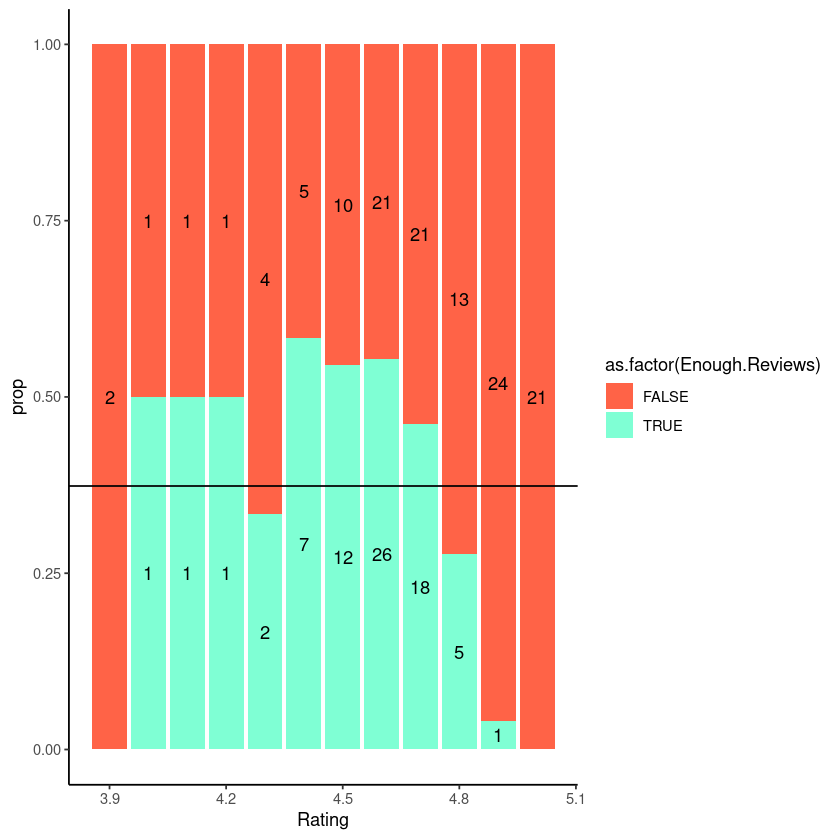

In [563]:
coffee %>% 
count(Rating,Enough.Reviews) %>%
group_by(Rating) %>%
mutate(prop = prop.table(n)) %>%
ggplot(aes(Rating, prop, fill = as.factor(Enough.Reviews), label = n)) + 
geom_col(position = "fill") + 
geom_text(position = position_fill(vjust = 0.5)) + scale_fill_manual(values = c("#FF6347","#7FFFD4")) + theme_classic() + geom_hline(yintercept = 0.3737)

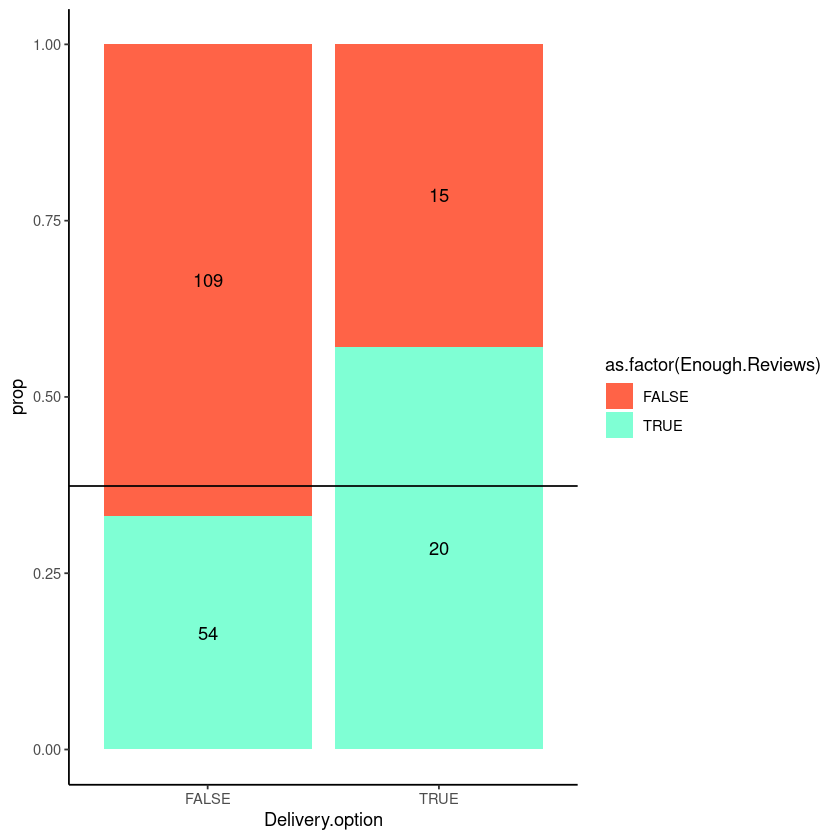

In [564]:
coffee %>% 
count(Delivery.option,Enough.Reviews) %>%
group_by(Delivery.option) %>%
mutate(prop = prop.table(n)) %>%
ggplot(aes(Delivery.option, prop, fill = as.factor(Enough.Reviews), label = n)) + 
geom_col(position = "fill") + 
geom_text(position = position_fill(vjust = 0.5)) + scale_fill_manual(values = c("#FF6347","#7FFFD4")) + theme_classic() + geom_hline(yintercept = 0.3737)

impressões até aqui: 
-Dos 198 lugares abertos há um ano, apenas 37% teve reviews o suficiente considerado pela empresa
-Fazer a análise por preço é complicada, pois a grande maioria dos locais foi classificado como preço médio. 100% dos baratos tiveram reviews o suficiente (total 2) e 3 dos caros tiveram reviews o suficiente (total 4)
-As regiões C,A,B (respectivamente) são as que menos obtiveram reviews o suficiente (menos de 25% do total), enquanto E e G obtiveram pelo menos metade dos locais com reviews o suficiente. D,H e J estão acima da média, mas não se destacam tanto quant E e G.
- Cafe e Coffee Shop estão ligeiramente acima da média, mas proporções bem parecidas. Espresso bar está um pouco abaixo da média, mas não muito relevante. 'Outros' se destaca mais negativamente, apenas cerca de 25% das lojas tiveram reviews o suficiente.
- Rating é bem equilibrado, os extremos (tanto de nota baixa quanto alta) 100% não tem reviews o suficiente, notas intermediárias normalmente estão acima da média na proporção tem/não tem.
- A presença de Delivery, Dine-in e Takeout fica acima da média para ter reviews o suficiente. 


In [565]:
corel <- coffee %>% select(Enough.Reviews, Delivery.option, Dine.in.option, Takeout.option)
cor(corel)

,Enough.Reviews,Delivery.option,Dine.in.option,Takeout.option
Enough.Reviews,1.0000000,0.18935032,0.4513508,0.23866333
Delivery.option,0.1893503,1.00000000,0.1237104,-0.04324008
Dine.in.option,0.4513508,0.12371041,1.0000000,0.45305024
Takeout.option,0.2386633,-0.04324008,0.4530502,1.00000000


In [566]:
#sucesso e numero de tentativas
sucDel <- sum(coffee$Delivery.option)
tentDel <- length(coffee$Delivery.option)
sucDine <- sum(coffee$Dine.in.option)
tentDine <- length(coffee$Dine.in.option)
sucTO <- sum(coffee$Takeout.option)
tentTO <- length(coffee$Takeout.option)
sucRev <- sum(coffee$Enough.Reviews)
tentRev <- length(coffee$Enough.Reviews)

In [567]:
#teste para comparar duas proporções, usando como comparativo sempre o Enough.Reviews
prop.test(x=c(sucDel, sucRev), n=c(tentDel, tentRev))
prop.test(x=c(sucDine, sucRev), n=c(tentDine, tentRev))
prop.test(x=c(sucTO, sucRev), n=c(tentTO, tentRev))


	2-sample test for equality of proportions with continuity correction

data:  c(sucDel, sucRev) out of c(tentDel, tentRev)
X-squared = 18.279, df = 1, p-value = 1.908e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.2878358 -0.1061036
sample estimates:
   prop 1    prop 2 
0.1767677 0.3737374 



	2-sample test for equality of proportions with continuity correction

data:  c(sucDine, sucRev) out of c(tentDine, tentRev)
X-squared = 42.957, df = 1, p-value = 5.595e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.2357655 0.4309012
sample estimates:
   prop 1    prop 2 
0.7070707 0.3737374 



	2-sample test for equality of proportions with continuity correction

data:  c(sucTO, sucRev) out of c(tentTO, tentRev)
X-squared = 48.587, df = 1, p-value = 3.16e-12
alternative hypothesis: two.sided
95 percent confidence interval:
 0.2568922 0.4501785
sample estimates:
   prop 1    prop 2 
0.7272727 0.3737374 


In [568]:
#transformar o Enough.Reviews em numerico para observar como 1 e 0
coffee$Enough.Reviews <- as.numeric(coffee$Enough.Reviews)

In [569]:
head(coffee)

Region,Place.name,Place.type,Rating,Enough.Reviews,Price,Delivery.option,Dine.in.option,Takeout.option
<fct>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<lgl>
C,Dim Kavu,Others,4.6,0,$$,FALSE,FALSE,FALSE
C,Коферум,Cafe,5.0,0,$$,FALSE,FALSE,TRUE
C,Кофейня Світ Чаю,Coffee shop,5.0,0,$$,FALSE,FALSE,TRUE
C,Кофейня Starcoff,Coffee shop,4.4,0,$$,FALSE,TRUE,TRUE
C,"Кофейня ""Friend Zone""",Coffee shop,5.0,0,$$,FALSE,TRUE,TRUE
C,Racers Coffee Shop,Espresso bar,4.6,0,$$,FALSE,TRUE,TRUE


In [570]:
fmla <- Enough.Reviews ~ Delivery.option + Dine.in.option + Takeout.option + Rating + Place.type + Region + Price

In [571]:
#regressao logistica
glm_model <- glm(fmla, data = coffee, family = "binomial")
pred <- predict(glm_model, coffee, type = "response")
coffee$resp <- ifelse(pred >= 0.3737, 1, 0) #media 
table(coffee$Enough.Reviews,coffee$resp, dnn=c('True Status','Predicted Status'))
mean(coffee$Enough.Reviews == coffee$resp)

           Predicted Status
True Status  0  1
          0 95 29
          1 10 64

[1] 0.8030303

In [572]:
#treino e teste

set.seed(74)

n <- nrow(coffee)
sample_rows <- sample(n, 0.8*n)

coffee_train <- coffee %>% filter(row_number() %in% sample_rows)
coffee_test <- coffee %>% filter(!row_number() %in% sample_rows)

In [573]:
set.seed(74)
glm_model2 <- glm(fmla, data = coffee_train, family = "binomial")


In [574]:
set.seed(74)
predglm <- predict(glm_model2, newdata = coffee_test, type = "response")

In [575]:
set.seed(74)
summary(coffee_test)

     Region   Place.name               Place.type     Rating     
 J      :8   Length:40          Cafe        :12   Min.   :4.000  
 D      :6   Class :character   Coffee shop :15   1st Qu.:4.575  
 G      :5   Mode  :character   Espresso bar:10   Median :4.700  
 B      :4                      Others      : 3   Mean   :4.685  
 C      :4                                        3rd Qu.:4.900  
 E      :4                                        Max.   :5.000  
 (Other):9                                                       
 Enough.Reviews  Price    Delivery.option Dine.in.option  Takeout.option 
 Min.   :0.000   $  : 1   Mode :logical   Mode :logical   Mode :logical  
 1st Qu.:0.000   $$ :39   FALSE:33        FALSE:13        FALSE:9        
 Median :0.000   $$$: 0   TRUE :7         TRUE :27        TRUE :31       
 Mean   :0.275                                                           
 3rd Qu.:1.000                                                           
 Max.   :1.000              

In [584]:
set.seed(74)
coffee_test$resp <- ifelse(predglm >= 0.275, 1, 0) #media 
table(coffee_test$Enough.Reviews,coffee_test$resp, dnn=c('True Status','Predicted Status'))
mean(coffee_test$Enough.Reviews == coffee_test$resp)

           Predicted Status
True Status  0  1
          0 15 14
          1  1 10

[1] 0.625

In [585]:
set.seed(74)
model_tree <- rpart(fmla, data = coffee_train, method = "class") 

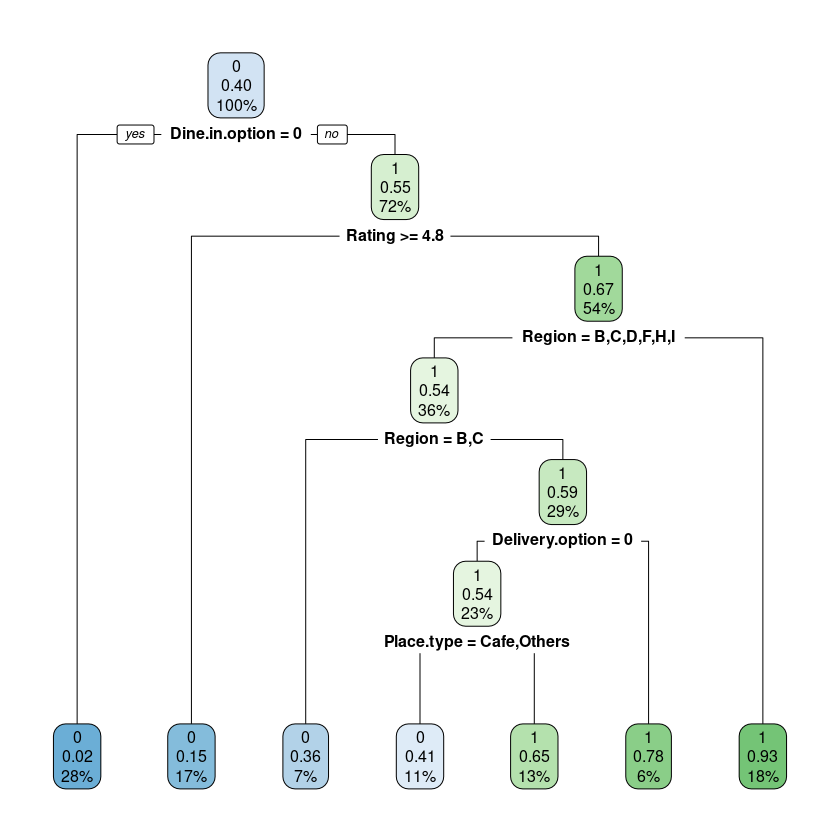

In [578]:
rpart.plot(model_tree)

In [579]:
set.seed(74)
coffee_test$pred_tree <- predict(model_tree, coffee_test, type = "class")

In [580]:
table(coffee_test$Enough.Reviews,coffee_test$pred_tree, dnn=c('True Status','Predicted Status'))
mean(coffee_test$Enough.Reviews == coffee_test$pred_tree)

           Predicted Status
True Status  0  1
          0 22  7
          1  4  7

[1] 0.725

In [581]:
set.seed(74)
model_tree2 <- rpart(fmla, data = coffee, method = "class")

In [582]:
set.seed(74)
coffee$pred_tree <- predict(model_tree, coffee, type = "class")

In [583]:
table(coffee$Enough.Reviews,coffee$pred_tree, dnn=c('True Status','Predicted Status'))
mean(coffee$Enough.Reviews == coffee$pred_tree)

           Predicted Status
True Status   0   1
          0 106  18
          1  20  54

[1] 0.8080808

resumindo: 
utilizando base de treino de 80% e teste de 20%, o resultado com regressão logística foi 62,5% de acuracia e o resultado com arvore de decisão foi 72,5%
já sem utilizar treino/teste, regressão logística teve uma acurácia de 80,3% e arvore de decisão teve 80,8%
em ambos o resultado foi melhor utilizando árvore de decisão